In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
import pytrends
import seaborn as sns
import statsmodels.api as sm

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Fama French 3-Factor Data

In [2]:
ffweekly = pd.read_csv("ffweekly.csv", index_col=0)
ffweekly.index = [datetime.datetime.strptime(str(d), '%Y%m%d') for d in ffweekly.index]

In [3]:
ffweekly.tail()

,Mkt-RF,SMB,HML,RF
2020-07-31,1.73,-0.49,-2.53,0.003
2020-08-07,2.70,3.39,1.59,0.002
2020-08-14,0.74,0.14,1.68,0.002
2020-08-21,0.86,-1.54,-5.17,0.002
2020-08-28,3.20,-1.43,0.98,0.002


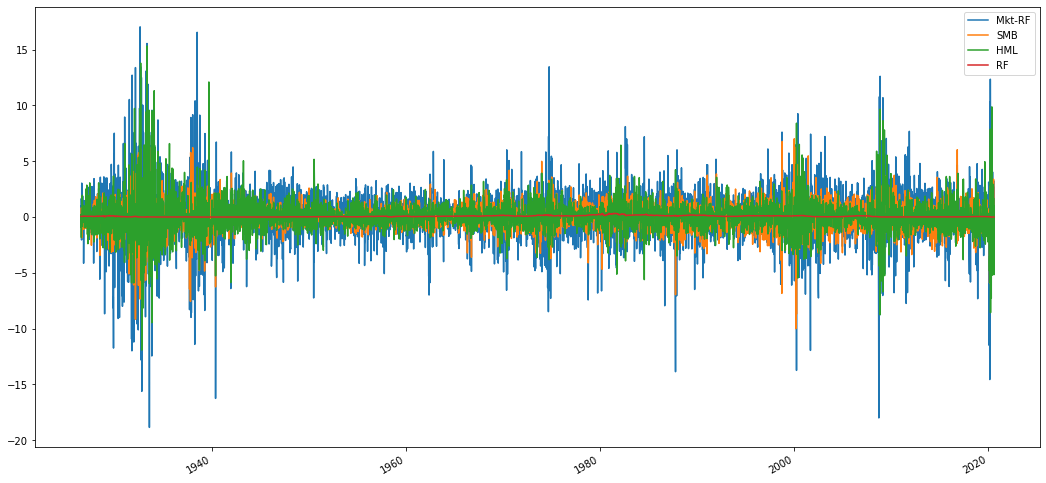

In [4]:
ffweekly.plot(figsize=(18, 9))

# Return Data of Selected Stocks

In [5]:
stock = web.get_data_yahoo(['NFLX', 'NVDA', 'TSLA', 'AAPL', 'MSFT', 'BA', 'FB'], \
                   start='2013-12-28', end='2020-09-30', interval='w')

In [6]:
stock = stock['Adj Close']
stock.index = stock.index + pd.Timedelta(days=4)

In [7]:
stock = stock.pct_change()

In [8]:
stock = stock.dropna()

In [9]:
stock.tail()

Symbols,NFLX,NVDA,TSLA,AAPL,MSFT,BA,FB
Date,,,,,,,
2020-09-04,-0.014965,-0.039950,-0.055028,-0.030828,-0.064043,-0.027019,-0.037220
2020-09-11,-0.065924,-0.035996,-0.109007,-0.074074,-0.047701,-0.063256,-0.057016
2020-09-18,-0.025040,0.002035,0.186279,-0.046071,-0.017841,0.005679,-0.052811
2020-09-25,0.027492,0.056156,-0.078729,0.050917,0.037078,-0.031712,0.009068
2020-10-02,0.092425,0.057540,0.100211,0.040167,0.022327,0.075819,0.046346


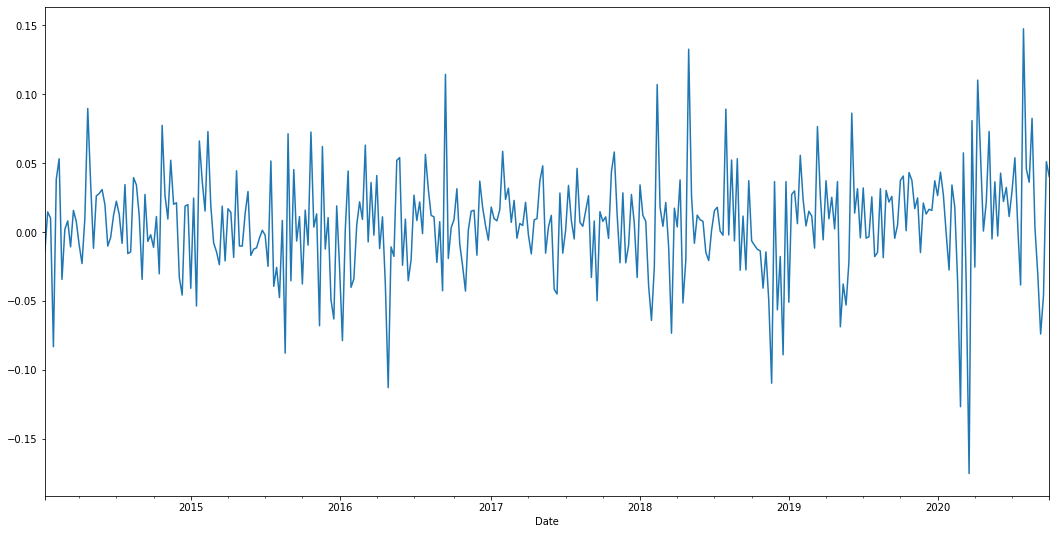

In [10]:
stock.AAPL.plot(figsize=(18, 9))

# Google SVI Data

In [11]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [12]:
kw_list = ['AAPL buy']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')

In [13]:
AAPL_buy_SVI = pytrends.interest_over_time()

In [14]:
kw_list = ['AAPL sell']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')
AAPL_sell_SVI = pytrends.interest_over_time()

In [15]:
kw_list = ['AAPL']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')
AAPL_volume = pytrends.interest_over_time()

In [16]:
AAPL_buy_SVI = AAPL_buy_SVI.drop('isPartial', axis=1)
AAPL_buy_SVI.index -= pd.Timedelta(days=2)

In [17]:
AAPL_sell_SVI = AAPL_sell_SVI.drop('isPartial', axis=1)
AAPL_sell_SVI.index -= pd.Timedelta(days=2)

In [18]:
AAPL_volume = AAPL_volume.drop('isPartial', axis=1)
AAPL_volume.index -= pd.Timedelta(days=2)
AAPL_volume.columns = ['AAPLVolume']

In [19]:
AAPL = stock[['AAPL']].merge(AAPL_buy_SVI, left_index=True, right_index=True)
AAPL = AAPL.merge(AAPL_sell_SVI, left_index=True, right_index=True)
AAPL = AAPL.merge(AAPL_volume, left_index=True, right_index=True)
AAPL.columns = ['r', 'AAPL buy', 'AAPL sell', 'AAPL']

In [20]:
AAPL['dAAPL'] = AAPL.AAPL.diff() / 100
AAPL['dAAPL buy'] = AAPL['AAPL buy'].diff() / 100
AAPL['dAAPL sell'] = AAPL['AAPL sell'].diff() / 100

AAPL['dAAPL_1'] = AAPL.dAAPL.shift(1)
AAPL['dAAPL_2'] = AAPL.dAAPL.shift(2)
AAPL['dAAPL buy_1'] = AAPL['dAAPL buy'].shift(1)
AAPL['dAAPL buy_2'] = AAPL['dAAPL buy'].shift(2)
AAPL['dAAPL sell_1'] = AAPL['dAAPL sell'].shift(1)
AAPL['dAAPL sell_2'] = AAPL['dAAPL sell'].shift(2)

In [21]:
AAPL[['r', 'dAAPL', 'dAAPL_1']].describe()

,r,dAAPL,dAAPL_1
count,260.000000,259.000000,258.000000
mean,0.006591,0.000656,0.000853
std,0.039491,0.098720,0.098861
min,-0.175307,-0.390000,-0.390000
25%,-0.013920,-0.040000,-0.040000
50%,0.008246,-0.010000,-0.010000
75%,0.028221,0.030000,0.030000
max,0.147330,0.430000,0.430000


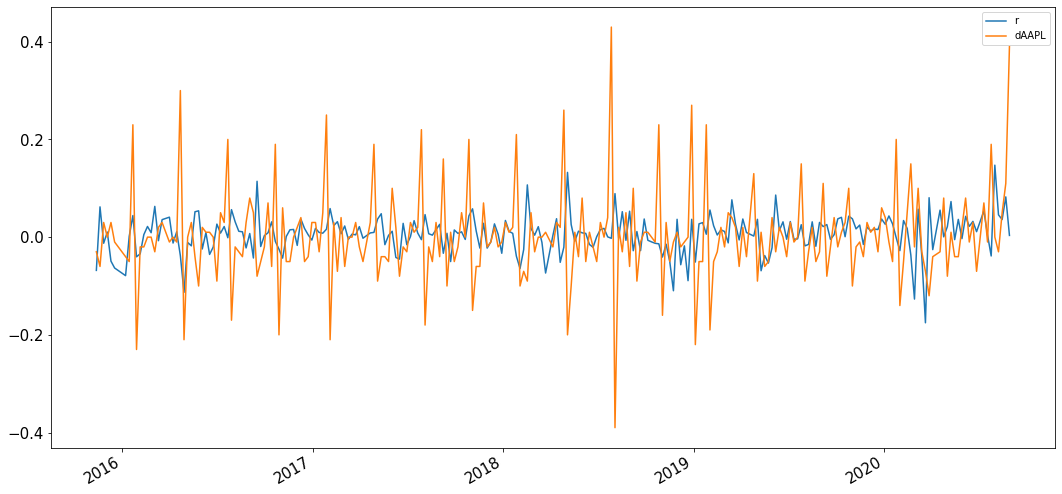

In [39]:
AAPL[['r', 'dAAPL']].plot(figsize=(18, 9), fontsize=15)

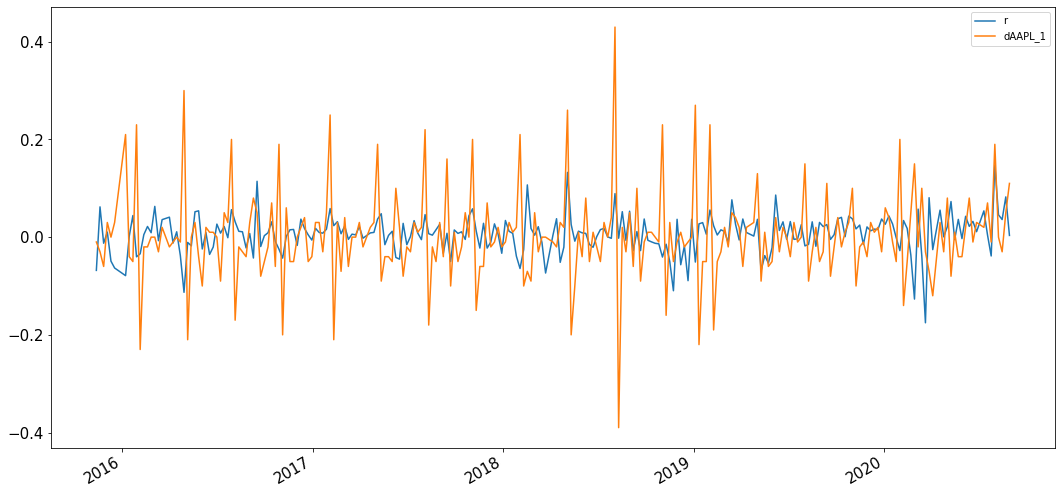

In [40]:
AAPL[['r', 'dAAPL_1']].plot(figsize=(18, 9),fontsize=15)

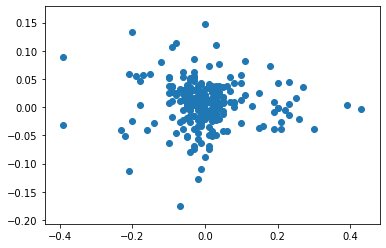

In [24]:
plt.scatter(AAPL.dAAPL, AAPL.r)

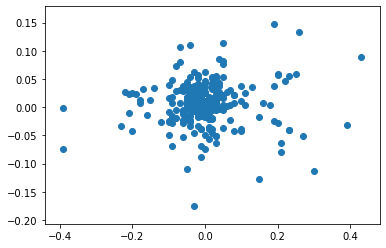

In [25]:
plt.scatter(AAPL.dAAPL_1, AAPL.r)

In [26]:
AAPL = AAPL.dropna()
X = AAPL[['dAAPL', 'dAAPL_1']]
X = sm.add_constant(X)
y = AAPL['r']
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      r   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7369
Date:                Sun, 18 Oct 2020   Prob (F-statistic):              0.480
Time:                        05:29:18   Log-Likelihood:                 467.10
No. Observations:                 257   AIC:                            -928.2
Df Residuals:                     254   BIC:                            -917.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.002      2.603      0.010       0.002       0.011
dAAPL         -0.0174      0.027     -0.642      0.522      -0.071       0.036
dAAPL_1        0.0196      0.027      0.730      0.466      -0.033       0.073
==============================================================================
Omnibus:                       32.146   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.619
Skew:                          -0.487   Prob(JB):                     2.33e-22
Kurtosis:                       5.891   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# differentiate between positive and negative

In [27]:
AAPL['AAPL ASVI'] = (AAPL['dAAPL buy'] - AAPL['dAAPL sell']) * AAPL['AAPL'] / 100

In [28]:
AAPL['AAPL ASVI_1'] = AAPL['AAPL ASVI'].shift(1)
AAPL = AAPL.dropna()

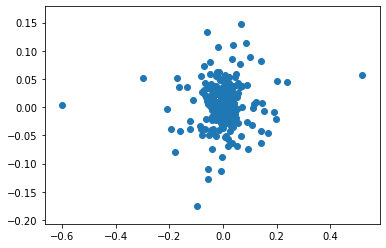

In [29]:
plt.scatter(AAPL['AAPL ASVI'], AAPL['r'])

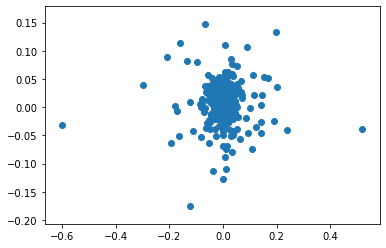

In [30]:
plt.scatter(AAPL['AAPL ASVI_1'], AAPL['r'])

In [31]:
AAPL = AAPL.dropna()
X = AAPL[['AAPL ASVI', 'AAPL ASVI_1']]
X = sm.add_constant(X)
y = AAPL['r']
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      r   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.314
Date:                Sun, 18 Oct 2020   Prob (F-statistic):              0.271
Time:                        05:29:19   Log-Likelihood:                 465.38
No. Observations:                 256   AIC:                            -924.8
Df Residuals:                     253   BIC:                            -914.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0064      0.002      2.587      0.010       0.002       0.011
AAPL ASVI       0.0528      0.033      1.609      0.109      -0.012       0.117
AAPL ASVI_1     0.0242      0.033      0.735      0.463      -0.041       0.089
==============================================================================
Omnibus:                       23.789   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.661
Skew:                          -0.323   Prob(JB):                     4.53e-16
Kurtosis:                       5.492   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# combine with Fama French data

In [32]:
AAPL = AAPL.merge(ffweekly / 100, left_index=True, right_index=True)

In [33]:
# descriptive features
AAPL[['r', 'dAAPL', 'dAAPL_1', 'Mkt-RF', 'SMB', 'HML']].describe()

,r,dAAPL,dAAPL_1,Mkt-RF,SMB,HML
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.006326,0.002181,0.002387,0.001937,-0.000307,-0.002261
std,0.039207,0.096075,0.093531,0.024443,0.012419,0.018728
min,-0.175307,-0.390000,-0.390000,-0.145600,-0.059100,-0.085700
25%,-0.013166,-0.040000,-0.040000,-0.006200,-0.007850,-0.010800
50%,0.008239,0.000000,0.000000,0.004600,-0.000700,-0.002200
75%,0.027684,0.030000,0.030000,0.014650,0.007000,0.006600
max,0.147330,0.430000,0.430000,0.103100,0.060300,0.098700


In [56]:
X = AAPL[['Mkt-RF', 'SMB', 'HML', 'dAAPL']]
X = sm.add_constant(X)
y = AAPL['r']
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      r   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     58.88
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.68e-34
Time:                        06:07:30   Log-Likelihood:                 526.34
No. Observations:                 243   AIC:                            -1043.
Df Residuals:                     238   BIC:                            -1025.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.002      1.573      0.117      -0.001       0.006
Mkt-RF         1.1612      0.077     15.013      0.000       1.009       1.314
SMB           -0.2721      0.150     -1.809      0.072      -0.568       0.024
HML           -0.5384      0.099     -5.433      0.000      -0.734      -0.343
dAAPL         -0.0419      0.019     -2.222      0.027      -0.079      -0.005
==============================================================================
Omnibus:                       21.371   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.427
Skew:                           0.219   Prob(JB):                     5.09e-16
Kurtosis:                       5.601   Cond. No.                         84.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X = AAPL[['Mkt-RF', 'SMB', 'HML', 'dAAPL', 'dAAPL_1']]
X = sm.add_constant(X)
y = AAPL['r']
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      r   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     48.70
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.53e-34
Time:                        05:29:19   Log-Likelihood:                 528.62
No. Observations:                 243   AIC:                            -1045.
Df Residuals:                     237   BIC:                            -1024.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.002      1.471      0.143      -0.001       0.006
Mkt-RF         1.1708      0.077     15.220      0.000       1.019       1.322
SMB           -0.2458      0.150     -1.641      0.102      -0.541       0.049
HML           -0.5626      0.099     -5.680      0.000      -0.758      -0.367
dAAPL         -0.0271      0.020     -1.357      0.176      -0.066       0.012
dAAPL_1        0.0436      0.021      2.119      0.035       0.003       0.084
==============================================================================
Omnibus:                       19.593   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.162
Skew:                          -0.086   Prob(JB):                     1.58e-15
Kurtosis:                       5.589   Cond. No.                         84.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X = AAPL[['Mkt-RF', 'SMB', 'HML', 'dAAPL_1']]
X = sm.add_constant(X)
y = AAPL['r']
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      r   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     60.20
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           4.57e-35
Time:                        05:29:19   Log-Likelihood:                 527.68
No. Observations:                 243   AIC:                            -1045.
Df Residuals:                     238   BIC:                            -1028.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.002      1.423      0.156      -0.001       0.006
Mkt-RF         1.1682      0.077     15.165      0.000       1.016       1.320
SMB           -0.2232      0.149     -1.497      0.136      -0.517       0.071
HML           -0.5690      0.099     -5.741      0.000      -0.764      -0.374
dAAPL_1        0.0533      0.019      2.762      0.006       0.015       0.091
==============================================================================
Omnibus:                       18.373   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.680
Skew:                          -0.007   Prob(JB):                     4.04e-14
Kurtosis:                       5.468   Cond. No.                         84.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X = AAPL[['Mkt-RF', 'SMB', 'HML']]
X = sm.add_constant(X)
y = AAPL['r']
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      r   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     75.62
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.99e-34
Time:                        05:29:19   Log-Likelihood:                 523.85
No. Observations:                 243   AIC:                            -1040.
Df Residuals:                     239   BIC:                            -1026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.002      1.522      0.129      -0.001       0.006
Mkt-RF         1.1529      0.078     14.802      0.000       0.999       1.306
SMB           -0.2426      0.151     -1.606      0.110      -0.540       0.055
HML           -0.5402      0.100     -5.407      0.000      -0.737      -0.343
==============================================================================
Omnibus:                       29.238   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.104
Skew:                           0.476   Prob(JB):                     3.31e-19
Kurtosis:                       5.738   Cond. No.                         84.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X = AAPL[['Mkt-RF', 'SMB', 'HML', 'AAPL ASVI', 'AAPL ASVI_1']]
X = sm.add_constant(X)
y = AAPL['r']
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      r   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     49.22
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           8.11e-35
Time:                        06:01:03   Log-Likelihood:                 529.28
No. Observations:                 243   AIC:                            -1047.
Df Residuals:                     237   BIC:                            -1026.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0027      0.002      1.516      0.131      -0.001       0.006
Mkt-RF          1.1602      0.077     15.134      0.000       1.009       1.311
SMB            -0.2385      0.149     -1.596      0.112      -0.533       0.056
HML            -0.5320      0.099     -5.375      0.000      -0.727      -0.337
AAPL ASVI       0.0706      0.024      2.912      0.004       0.023       0.118
AAPL ASVI_1     0.0673      0.028      2.405      0.017       0.012       0.122
==============================================================================
Omnibus:                       31.368   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.811
Skew:                           0.527   Prob(JB):                     3.15e-20
Kurtosis:                       5.785   Cond. No.                         84.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""